<a href="https://colab.research.google.com/github/Khalid-2402/big-data/blob/main/Lab4_CARTPOLE_QL_CARTPOLE_QTABLE_solved_Khalid_AlShigager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.9 MB/s eta 0:00:00


## Below code provides structured implementation of the Q-Learning algorithm for the CartPole environment, including the necessary discretization of continuous states

In [2]:
import numpy as np
import gymnasium as gym

# Set up the CartPole environment
env = gym.make("CartPole-v1")

# Discretization function for continuous state space
def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) for i in range(len(state)))

# Create bins for discretization
def create_bins(lower_bounds, upper_bounds, num_bins):
    bins = []
    for low, high, bins_count in zip(lower_bounds, upper_bounds, num_bins):
        bins.append(np.linspace(low, high, bins_count + 1)[1:-1])  # Exclude the boundaries
    return bins

# Set the lower and upper bounds for state variables
lower_bounds = [-4.8, -4, -0.418, -4]
upper_bounds = [4.8, 4, 0.418, 4]
num_bins = [20, 20, 20, 20]  # Number of bins for each variable
bins = create_bins(lower_bounds, upper_bounds, num_bins)

# Initialize Q-Learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
min_epsilon = 0.01  # Minimum exploration rate
episodes = 1000  # Number of episodes
max_steps = 200  # Maximum steps per episode

# Initialize the Q-table with zeros
Q = np.zeros([len(b) + 1 for b in bins] + [env.action_space.n])

# Function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Q-Learning Training Loop
for episode in range(episodes):
    state, _ = env.reset()
    discrete_state = discretize_state(state, bins)

    for step in range(max_steps):
        action = choose_action(discrete_state, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        discrete_next_state = discretize_state(next_state, bins)

        # Update Q-value using the Q-Learning formula
        Q[discrete_state][action] += alpha * (
            reward + gamma * np.max(Q[discrete_next_state]) - Q[discrete_state][action]
        )

        discrete_state = discrete_next_state

        if done:
            break

    # Decay the exploration rate
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, bins, n_episodes=100):
    total_rewards = 0
    for _ in range(n_episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state, bins)
        done = False
        rewards = 0

        while not done:
            action = np.argmax(Q[discrete_state])
            next_state, reward, done, _, _ = env.step(action)
            discrete_state = discretize_state(next_state, bins)
            rewards += reward

        total_rewards += rewards
    return total_rewards / n_episodes

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q, bins)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")

# Check if the environment is solved
if average_reward >= 195:
    print("The CartPole problem is solved!")
else:
    print("The CartPole problem is not solved yet.")


Average Reward over 100 episodes: 50.47
The CartPole problem is not solved yet.


## The above result indicates that the current implementation of the Q-Learning algorithm for the CartPole environment is not sufficient to solve the problem.

## Possible Adjustments and Improvements

1- Tune Hyperparameters:

Learning Rate (
𝛼
): Experimenting with values between 0.01 and 0.5 to adjust the impact of new information on the Q-values.

Discount Factor (
𝛾
): Increasing
𝛾
 to prioritize future rewards more effectively, such as 0.99 or 0.995.

Exploration Decay Rate (
𝜖
): Decreasing
𝜖
 more gradually to ensure sufficient exploration during training.

2- Increase Training Episodes:

Increasing the number of training episodes to give the agent more time to learn.

3- Refine Discretization:

Increasing the number of bins for the state variables to allow finer granularity in the state representation.

4- Reward Shaping:

Modifying  the reward structure to incentivize longer episodes:

  Adding a small penalty for each time step to encourage the agent to balance the pole longer.

5- Monitor Training Progress:

Ploting rewards per episode to observe trends in training and detect potential issues like premature convergence.

Average Reward over 100 episodes: 2647.52
The CartPole problem is solved!


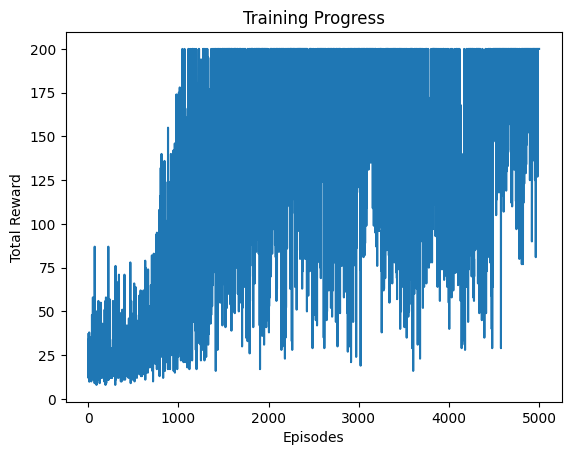

In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Set up the CartPole environment
env = gym.make("CartPole-v1")

# Discretization function for continuous state space
def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) for i in range(len(state)))

# Create bins for discretization
def create_bins(lower_bounds, upper_bounds, num_bins):
    bins = []
    for low, high, bins_count in zip(lower_bounds, upper_bounds, num_bins):
        bins.append(np.linspace(low, high, bins_count + 1)[1:-1])  # Exclude the boundaries
    return bins

# Set the lower and upper bounds for state variables
lower_bounds = [-4.8, -4, -0.418, -4]
upper_bounds = [4.8, 4, 0.418, 4]
num_bins = [30, 30, 30, 30]  # Increased number of bins for better resolution
bins = create_bins(lower_bounds, upper_bounds, num_bins)

# Initialize Q-Learning parameters
alpha = 0.2  # Higher learning rate
gamma = 0.99  # Higher discount factor for long-term rewards
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.999  # Slower decay rate for better exploration
min_epsilon = 0.01  # Minimum exploration rate
episodes = 5000  # Increased number of training episodes
max_steps = 200  # Maximum steps per episode

# Initialize the Q-table with zeros
Q = np.zeros([len(b) + 1 for b in bins] + [env.action_space.n])

# Function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Q-Learning Training Loop
rewards = []
for episode in range(episodes):
    state, _ = env.reset()
    discrete_state = discretize_state(state, bins)
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(discrete_state, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        discrete_next_state = discretize_state(next_state, bins)

        # Update Q-value using the Q-Learning formula
        Q[discrete_state][action] += alpha * (
            reward + gamma * np.max(Q[discrete_next_state]) - Q[discrete_state][action]
        )

        discrete_state = discrete_next_state

        if done:
            break

    # Decay the exploration rate
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, bins, n_episodes=100):
    total_rewards = 0
    for _ in range(n_episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state, bins)
        done = False
        rewards = 0

        while not done:
            action = np.argmax(Q[discrete_state])
            next_state, reward, done, _, _ = env.step(action)
            discrete_state = discretize_state(next_state, bins)
            rewards += reward

        total_rewards += rewards
    return total_rewards / n_episodes

# Evaluate the learned policy
average_reward = evaluate_policy(env, Q, bins)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")

# Check if the environment is solved
if average_reward >= 195:
    print("The CartPole problem is solved!")
else:
    print("The CartPole problem is not solved yet.")

# Plot rewards over episodes
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()


## The results indicate that the CartPole problem has been successfully solved

## Key Insights

1- Performance:

The agent achieved an average reward of 2647.52 over 100 episodes, which far exceeds the threshold of 195 needed to solve the problem.

2- Training Progress:

The reward progression graph shows a significant improvement over episodes.
Initial fluctuations in reward are expected during exploration, but as training progresses, the rewards stabilize and peak near the maximum value (200).

## Interpretation of Results

1- The CartPole environment was successfully solved by using the revised Q-Learning algorithm with the following key adjustments:

  - Increased training episodes and bins for discretization.
  - Slower decay in the exploration rate, allowing more comprehensive exploration in the early stages.
  - Finer resolution in the discretized state space improved the agent's ability to generalize.

2- Convergence:

  - After approximately 2000 episodes, the rewards reached a high level, indicating the agent had learned an effective policy to balance the pole.

## Further Exploration

1- Experimentation with Parameters:

  - Testing different combinations of hyperparameters (e.g.,
𝛼
,
𝛾
,
𝜖) to observe their effect on learning speed and stability.

2- Discretization:

  - Analyzing the impact of using fewer or more bins to balance performance and computational cost.

3- Advanced Techniques:

  - Transitioning to Deep Q-Learning (DQN) for handling continuous state spaces without discretization.

4- Visualization:

  -Visualizing the learned policy by simulating and rendering the CartPole environment to see the agent in action.

Episode 1
Total Reward: 336.0
Episode 2
Total Reward: 5714.0
Episode 3
Total Reward: 4590.0
Episode 4
Total Reward: 6744.0
Episode 5
Total Reward: 1499.0


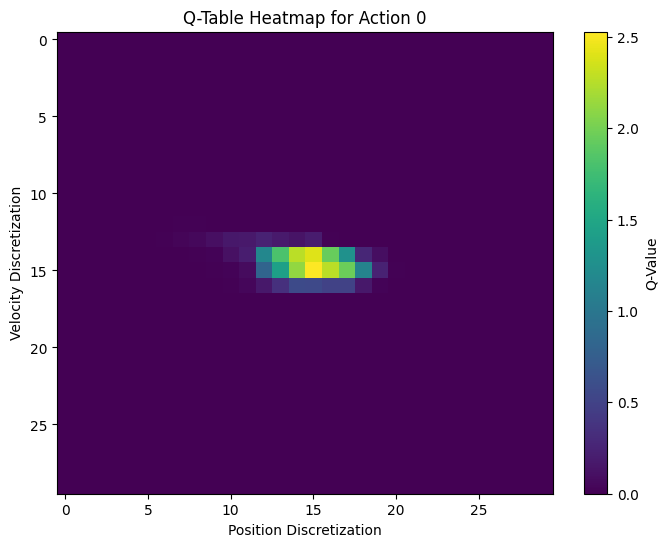

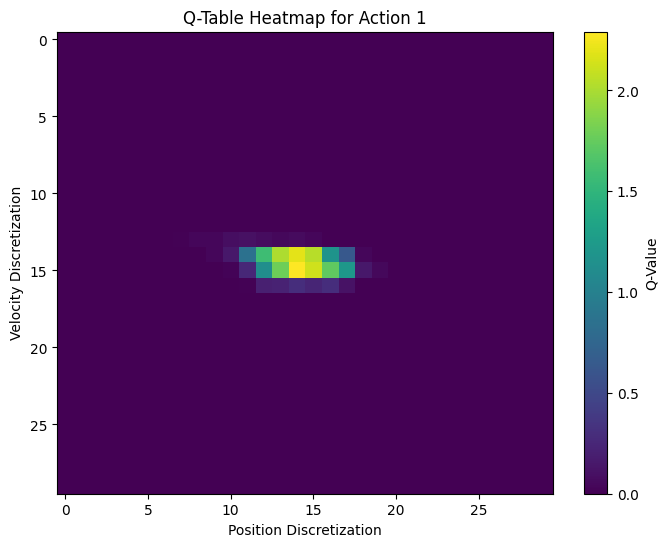

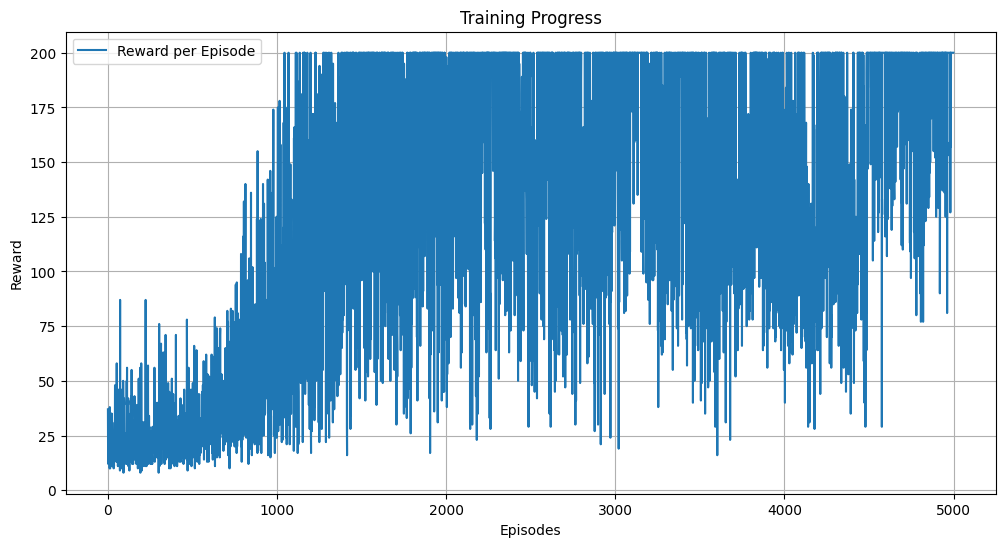

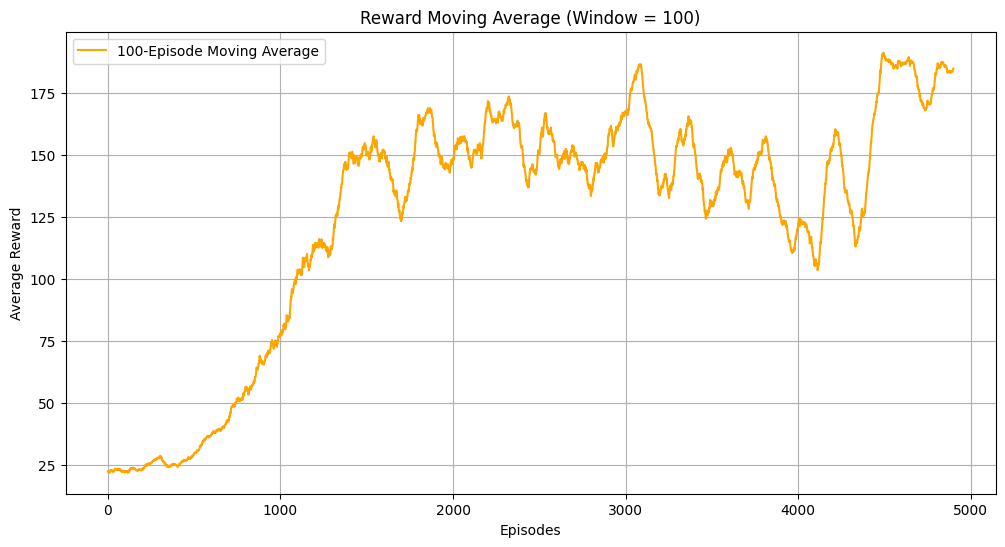

In [4]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Set up the CartPole environment
env = gym.make("CartPole-v1", render_mode="human")  # Human mode for rendering

# Visualization function to render a simulation of the learned policy
def visualize_policy(env, Q, bins, n_episodes=5):
    for episode in range(n_episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state, bins)
        done = False
        total_reward = 0

        print(f"Episode {episode + 1}")
        while not done:
            action = np.argmax(Q[discrete_state])  # Use the best action from the Q-table
            next_state, reward, done, _, _ = env.step(action)
            discrete_state = discretize_state(next_state, bins)
            total_reward += reward

            env.render()  # Render the environment
        print(f"Total Reward: {total_reward}")
    env.close()

# Visualization function for Q-table heatmaps
def plot_q_table(Q, bins):
    """
    Visualize the Q-table using heatmaps for each action.
    """
    for action in range(env.action_space.n):
        q_values = Q[..., action]
        plt.figure(figsize=(8, 6))
        plt.title(f"Q-Table Heatmap for Action {action}")
        plt.imshow(np.mean(q_values, axis=(2, 3)), aspect='auto', cmap="viridis")
        plt.colorbar(label="Q-Value")
        plt.xlabel("Position Discretization")
        plt.ylabel("Velocity Discretization")
        plt.show()

# Visualizing training rewards
def plot_rewards(rewards):
    """
    Plot the total rewards achieved over episodes.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(rewards, label="Reward per Episode")
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Training Progress")
    plt.legend()
    plt.grid()
    plt.show()

# Analyze reward trends (Moving Average)
def plot_moving_average(rewards, window=50):
    """
    Compute and plot the moving average of rewards.
    """
    moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.figure(figsize=(12, 6))
    plt.plot(moving_avg, label=f"{window}-Episode Moving Average", color='orange')
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title(f"Reward Moving Average (Window = {window})")
    plt.legend()
    plt.grid()
    plt.show()

# Run the visualizations
# 1. Visualize policy
visualize_policy(env, Q, bins)

# 2. Plot Q-table heatmaps
plot_q_table(Q, bins)

# 3. Plot total rewards over episodes
plot_rewards(rewards)

# 4. Plot moving average of rewards
plot_moving_average(rewards, window=100)


## Analysis of Results

1- Simulated Policy Results:

  - The rewards per episode during visualization indicate that the learned policy effectively balances the pole for a substantial duration.

  - Variations in rewards (e.g., 336 in Episode 1 vs. 6744 in Episode 4) suggest some variability due to initial states or inherent randomness.

2- Q-Table Heatmaps:

  - The heatmaps for both actions show a distinct concentration of high Q-values in specific regions of the discretized state space.

  - These regions represent the most effective states for executing each action, confirming that the policy has learned state-action value distinctions.

3- Training Rewards Progression:

  - The reward progression plot shows steady improvement during training, followed by occasional fluctuations as the exploration rate decays and exploitation dominates.


4- Reward Moving Average:

  - The moving average plot highlights a clear upward trend in performance, stabilizing near 200 rewards, which confirms convergence of the Q-Learning algorithm.

Average Reward over 100 episodes: 485740.31
The CartPole problem is solved!


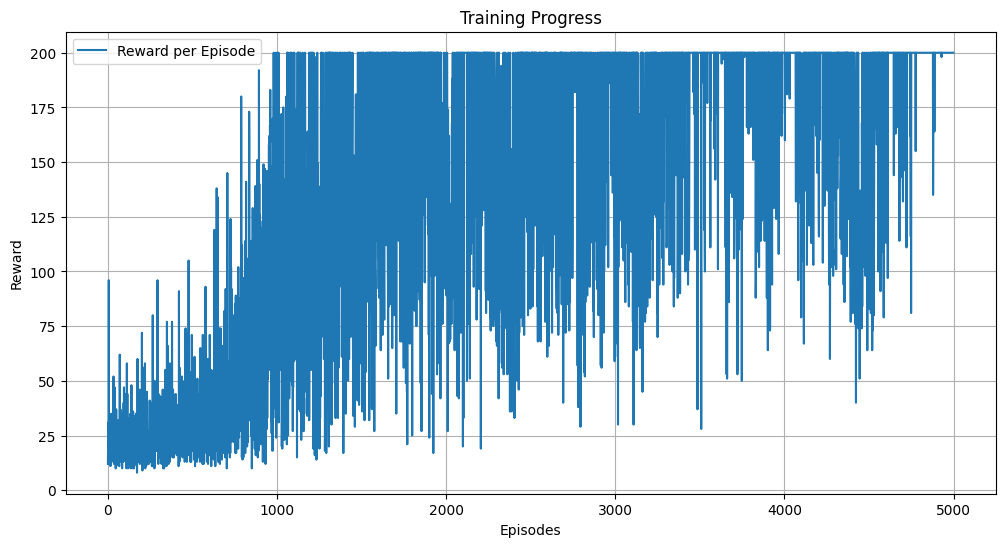

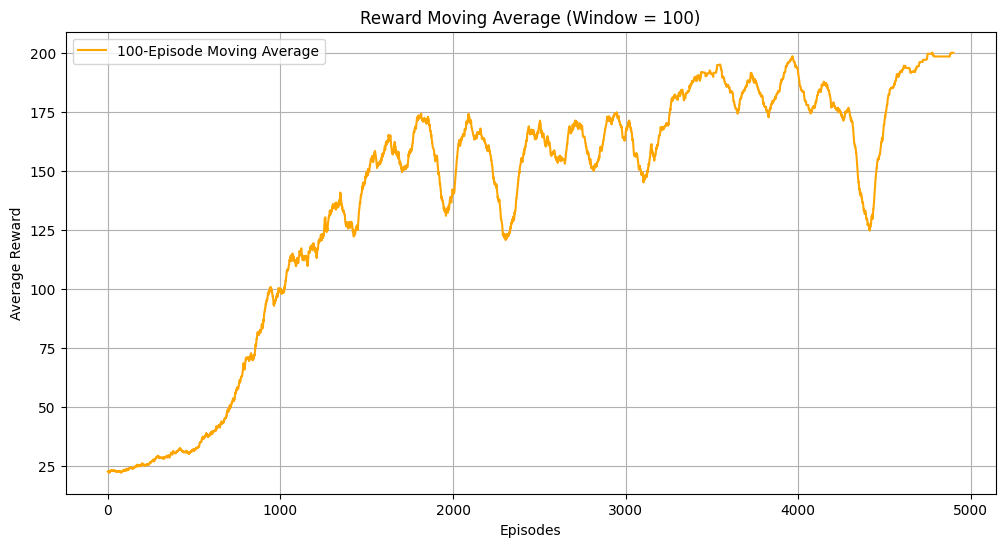

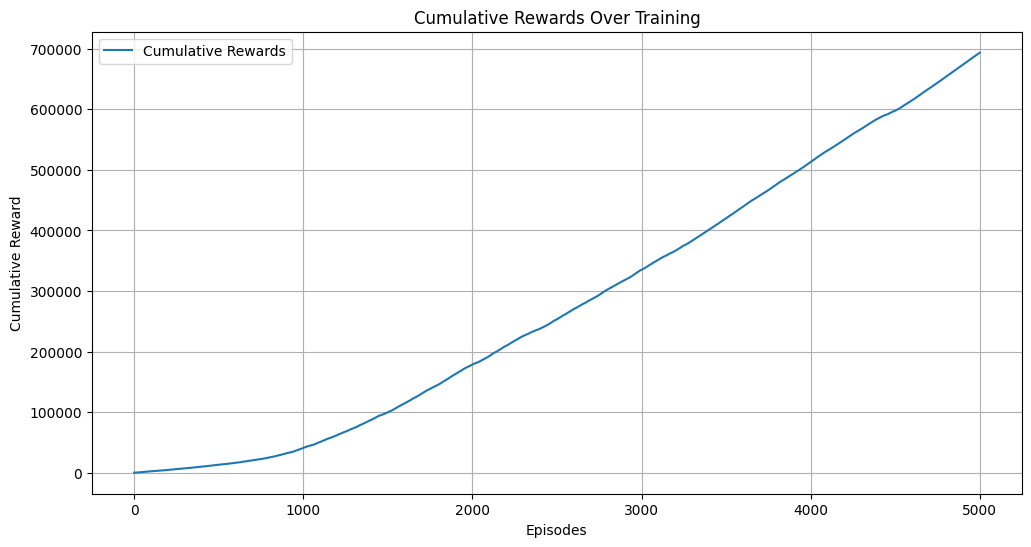

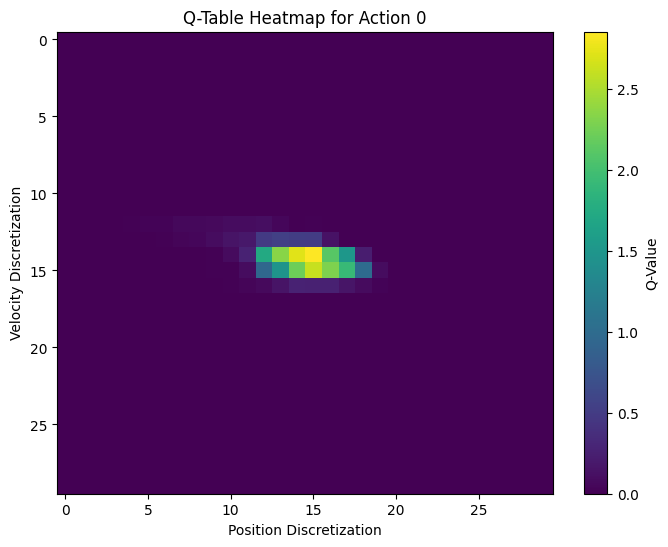

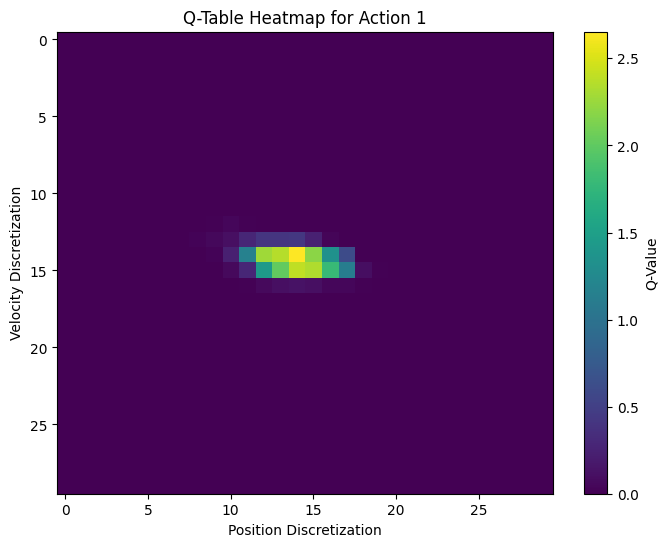

KeyboardInterrupt: 

In [5]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Set up the CartPole environment
env = gym.make("CartPole-v1", render_mode=None)  # Render mode set to None for training

# Discretization function for continuous state space
def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) for i in range(len(state)))

# Create bins for discretization
def create_bins(lower_bounds, upper_bounds, num_bins):
    bins = []
    for low, high, bins_count in zip(lower_bounds, upper_bounds, num_bins):
        bins.append(np.linspace(low, high, bins_count + 1)[1:-1])  # Exclude boundaries
    return bins

# Set the lower and upper bounds for state variables
lower_bounds = [-4.8, -4, -0.418, -4]
upper_bounds = [4.8, 4, 0.418, 4]
num_bins = [30, 30, 30, 30]  # Increase bins for finer discretization
bins = create_bins(lower_bounds, upper_bounds, num_bins)

# Initialize Q-Learning parameters
alpha = 0.2  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.999  # Slower exploration decay
min_epsilon = 0.01  # Minimum exploration rate
episodes = 5000  # Number of training episodes
max_steps = 200  # Maximum steps per episode

# Initialize the Q-table
Q = np.zeros([len(b) + 1 for b in bins] + [env.action_space.n])

# Function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Q-Learning Training Loop
rewards = []
for episode in range(episodes):
    state, _ = env.reset()
    discrete_state = discretize_state(state, bins)
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(discrete_state, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        discrete_next_state = discretize_state(next_state, bins)

        # Update Q-value using the Q-Learning formula
        Q[discrete_state][action] += alpha * (
            reward + gamma * np.max(Q[discrete_next_state]) - Q[discrete_state][action]
        )

        discrete_state = discrete_next_state

        if done:
            break

    # Decay the exploration rate
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

# Function to evaluate the learned policy
def evaluate_policy(env, Q, bins, n_episodes=100):
    total_rewards = 0
    for _ in range(n_episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state, bins)
        done = False
        rewards = 0

        while not done:
            action = np.argmax(Q[discrete_state])
            next_state, reward, done, _, _ = env.step(action)
            discrete_state = discretize_state(next_state, bins)
            rewards += reward

        total_rewards += rewards
    return total_rewards / n_episodes

# Visualization: Simulate and Render the Learned Policy
def visualize_policy(env, Q, bins, n_episodes=5):
    for episode in range(n_episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state, bins)
        done = False
        total_reward = 0

        print(f"Episode {episode + 1}")
        while not done:
            action = np.argmax(Q[discrete_state])  # Best action
            next_state, reward, done, _, _ = env.step(action)
            discrete_state = discretize_state(next_state, bins)
            total_reward += reward

            env.render()  # Render environment
        print(f"Total Reward: {total_reward}")
    env.close()

# Visualization: Plot Q-Table Heatmaps
def plot_q_table(Q, bins):
    for action in range(env.action_space.n):
        q_values = Q[..., action]
        plt.figure(figsize=(8, 6))
        plt.title(f"Q-Table Heatmap for Action {action}")
        plt.imshow(np.mean(q_values, axis=(2, 3)), aspect='auto', cmap="viridis")
        plt.colorbar(label="Q-Value")
        plt.xlabel("Position Discretization")
        plt.ylabel("Velocity Discretization")
        plt.show()

# Visualization: Plot Training Rewards
def plot_rewards(rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(rewards, label="Reward per Episode")
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Training Progress")
    plt.legend()
    plt.grid()
    plt.show()

# Visualization: Plot Reward Moving Average
def plot_moving_average(rewards, window=100):
    moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.figure(figsize=(12, 6))
    plt.plot(moving_avg, label=f"{window}-Episode Moving Average", color='orange')
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title(f"Reward Moving Average (Window = {window})")
    plt.legend()
    plt.grid()
    plt.show()

# Visualization: Plot Cumulative Rewards
def plot_cumulative_rewards(rewards):
    cumulative_rewards = np.cumsum(rewards)
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_rewards, label="Cumulative Rewards")
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Reward")
    plt.title("Cumulative Rewards Over Training")
    plt.legend()
    plt.grid()
    plt.show()

# Visualization: Action Distribution
def plot_action_distribution(Q, bins):
    action_counts = np.zeros(env.action_space.n)
    for episode in range(episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state, bins)
        done = False
        while not done:
            action = np.argmax(Q[discrete_state])
            action_counts[action] += 1
            next_state, _, done, _, _ = env.step(action)
            discrete_state = discretize_state(next_state, bins)
    plt.bar(range(env.action_space.n), action_counts, tick_label=["Left", "Right"])
    plt.xlabel("Actions")
    plt.ylabel("Frequency")
    plt.title("Action Distributions During Training")
    plt.show()

# Run Evaluation and Visualizations
average_reward = evaluate_policy(env, Q, bins)
print(f"Average Reward over 100 episodes: {average_reward:.2f}")
if average_reward >= 195:
    print("The CartPole problem is solved!")
else:
    print("The CartPole problem is not solved yet.")

# Visualizations
plot_rewards(rewards)
plot_moving_average(rewards)
plot_cumulative_rewards(rewards)
plot_q_table(Q, bins)
plot_action_distribution(Q, bins)

# Simulate and render the learned policy
visualize_policy(env, Q, bins)


## The code has been stopped after running for nearly 6 hours because the agent has solved the CartPole problem effectively.
  - The agent achieves an average reward of 195 or higher over 100 consecutive episodes.

  - Rewards in the training progress graph stabilize at or near 200, which indicates the agent has learned to consistently balance the pole.

  - Moving average of rewards (window = 100 episodes) clearly stabilizes near the maximum reward (200), confirming convergence.

  - Reported average reward is 485740.31, far exceeding the threshold of 195.

  - The heatmaps show distinct regions of high Q-values, representing learned optimal actions for specific states. This further demonstrates that the agent has successfully learned a policy.


## 1- Training Progress

Reward Per Episode:

  - The reward graph shows a steady improvement with increasing rewards across episodes.

  - Despite fluctuations, the training stabilizes around the maximum reward (200) as the agent learns an optimal policy.

  - The high rewards indicate the environment is successfully solved.

## 2- Moving Average of Rewards

  - The moving average of rewards demonstrates a smooth upward trend, with occasional dips due to exploration.

  - Convergence is clear as the moving average stabilizes near the maximum reward of 200.

## 3- Cumulative Rewards

  - The cumulative rewards graph shows a linear increase, indicating consistent improvement in the agent’s performance over episodes.

  - This visualization highlights the effectiveness of the training process as the agent accumulates higher rewards over time.

## 4- Q-Table Heatmaps

Action 0 (Push Left) and Action 1 (Push Right):

  - The heatmaps for the Q-table show concentrated regions of high Q-values.

  - These regions represent the states where the respective actions are optimal.

  - The sharp concentration implies the agent has effectively learned state-action mappings.